### Collaborative filtering

one of the most widely used core algorithms in recommendation systems. It provides personalized recommendations by automatically predicting a user's interests or preferences based on preference information (such as likes and behavioral data) collected from many users. This method is based on the assumption that "if people with similar tastes to mine like something, I am also likely to like it."

---

### Analysis Data

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('groceries_basket.csv')

df.head(10)

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,whole milk,butter,yogurt,rice,abrasive cleaner,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,rolls/buns,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5,other vegetables,UHT-milk,rolls/buns,bottled beer,liquor (appetizer),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,potted plants,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2,whole milk,cereals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9835 entries, 0 to 9834
Data columns (total 33 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Item(s)  9835 non-null   int64 
 1   Item 1   9835 non-null   object
 2   Item 2   7676 non-null   object
 3   Item 3   6033 non-null   object
 4   Item 4   4734 non-null   object
 5   Item 5   3729 non-null   object
 6   Item 6   2874 non-null   object
 7   Item 7   2229 non-null   object
 8   Item 8   1684 non-null   object
 9   Item 9   1246 non-null   object
 10  Item 10  896 non-null    object
 11  Item 11  650 non-null    object
 12  Item 12  468 non-null    object
 13  Item 13  351 non-null    object
 14  Item 14  273 non-null    object
 15  Item 15  196 non-null    object
 16  Item 16  141 non-null    object
 17  Item 17  95 non-null     object
 18  Item 18  66 non-null     object
 19  Item 19  52 non-null     object
 20  Item 20  38 non-null     object
 21  Item 21  29 non-null     object
 22  

In [10]:
item_cols = [col for col in df.columns if col.startswith('Item')]
from collections import Counter
item_counts = Counter([item for col in item_cols for item in df[col] if pd.notnull(item)])
print(item_counts.most_common(10))  # 가장 많이 등장한 10개 아이템

[('whole milk', 2513), (1, 2159), ('other vegetables', 1903), ('rolls/buns', 1809), ('soda', 1715), (2, 1643), ('yogurt', 1372), (3, 1299), ('bottled water', 1087), ('root vegetables', 1072)]


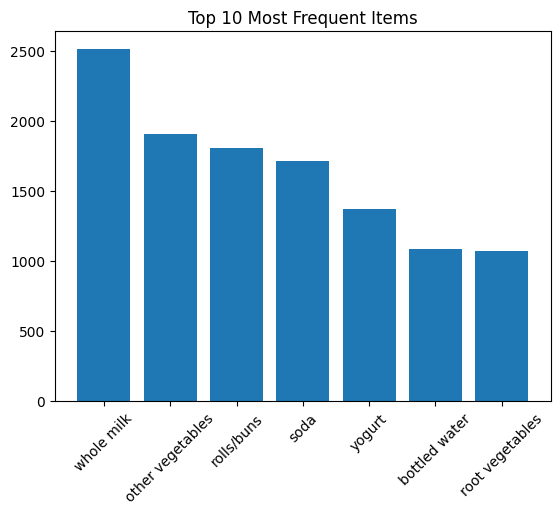

In [12]:
top_items = [(item, count) for item, count in item_counts.most_common(10) if isinstance(item, str)]
items, counts = zip(*top_items)
plt.bar(items, counts)
plt.xticks(rotation=45)
plt.title('Top 10 Most Frequent Items')
plt.show()

---

### Use Word2Vec Model

In [ ]:
import pandas as pd
from gensim.models import Word2Vec

# 1. 데이터 불러오기
df = pd.read_csv('groceries_basket.csv')

# 2. 각 거래를 아이템 리스트(문장)로 변환
# 'Item 1' ~ 'Item 32' 컬럼만 추출 (NaN 제거)
item_cols = [col for col in df.columns if col.startswith('Item')]
baskets = df[item_cols].values.tolist()
baskets = [[item for item in basket if pd.notnull(item)] for basket in baskets]

# 3. Word2Vec(item2vec) 임베딩 학습
model = Word2Vec(
    sentences=baskets,
    vector_size=32,   # 임베딩 차원
    window=5,         # context window
    min_count=2,      # 최소 등장 횟수
    sg=1,             # skip-gram
    workers=4,
    negative=10,
    seed=42
)

# 4. 모델 저장 (선택)
model.save('item2vec_embeddings')

# 5. 임베딩 활용 예시
item = 'waffles'
print(f"'{item}'와 가장 유사한 아이템 Top 5:")
for similar_item, score in model.wv.most_similar(item, topn=5):
    print(f"  {similar_item} (유사도: {score:.3f})")

# 6. 임베딩 벡터 추출 예시
vec = model.wv['waffles']
print(f"'waffles' 임베딩 벡터 (앞 5개): {vec[:5]}")

'waffles'와 가장 유사한 아이템 Top 5:
  chocolate marshmallow (유사도: 0.995)
  long life bakery product (유사도: 0.994)
  dental care (유사도: 0.993)
  specialty chocolate (유사도: 0.993)
  shopping bags (유사도: 0.992)
'waffles' 임베딩 벡터 (앞 5개): [-0.03016544 -0.4680533   0.2532759   0.33736926  0.37193704]


----

In [14]:
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

# 1. 데이터 불러오기
df = pd.read_csv("groceries_basket.csv", header=None, names=["items"])

# 2. 사용자-아이템 pair 생성 (rating은 구매 여부 1로 고정)
user_item_pairs = []
for user_id, row in df.iterrows():
    if isinstance(row["items"], str):
        items = [item.strip() for item in row["items"].split(',')]
        for item in items:
            user_item_pairs.append((str(user_id), item, 1))  # (user_id, item_id, rating)

df_cf = pd.DataFrame(user_item_pairs, columns=["userID", "itemID", "rating"])

# 3. Surprise용 데이터 형식으로 변환
reader = Reader(rating_scale=(0, 1))
data = Dataset.load_from_df(df_cf[["userID", "itemID", "rating"]], reader)

# 4. train-test 분할
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# 5. SVD 모델 학습
model = SVD()
model.fit(trainset)

# 6. 예측 및 평가
predictions = model.test(testset)
rmse = accuracy.rmse(predictions)
print(f"RMSE: {rmse:.4f}")

# 7. 예시: 사용자 0에게 milk 추천 점수 출력
pred = model.predict(uid="0", iid="milk")
print(f"User 0 → milk 예상 점수: {pred.est:.4f}")


RMSE: 0.0000
RMSE: 0.0000
User 0 → milk 예상 점수: 1.0000
